# Making the Natural Color RGB image
Tips from Rick Kohrs

The stretches are   
0 -> breakpt, 0 -> 10  
breakpoint -> 255, 11->255  

- Red breakpoint is 33
- Green breakpoint is 40
- Blue breakpoint is 50


In [1]:
from goes2go.data import goes_latest, goes_nearesttime
from goes2go.rgb import normalize, TrueColor, NaturalColor
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from BB_maps.add_to_cartopy import common_features

In [7]:
g = goes_nearesttime('2021-01-01 18:00', satellite=16, product='ABI', domain='F')
#g = goes_latest(satellite=16, product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPF    |
 |    Domain: F                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes16/ABI-L2-MCMIPF].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [8]:
g

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1518 ... -0.1518
  * x                                       (x) float32 -0.1518 ... 0.1518
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    band_wavelength_C02                     (band) float32 ...
    band_wavelength_C03                     (band) float32 ...
    band_wavelength_C04                     (band) float32 ...
    band_wavelength_C05                     (band) float32 ...
    band_wavelength_C06                     (band) float32 ...
    band_wavelength_C07                     (band) float32 ...
    band_wavelength_C08                     (band) float32 ...
    band_wavelength_C09                     (band) float32 ...
    band_wavelength_C10                     (band) float32 ...
    band_wavelength_C11                     (band) float32 ...
    band_wavelength_C12                     (band) float32 ...
    band_wavelength_C13                     (band) float32 ...
    band_wavelength_C14                     (band) float32 ...
    band_wavelength_C15                     (band) float32 ...
    band_wavelength_C16                     (band) float32 ...
    band_id_C01                             (band) int8 ...
    band_id_C02                             (band) int8 ...
    band_id_C03                             (band) int8 ...
    band_id_C04                             (band) int8 ...
    band_id_C05                             (band) int8 ...
    band_id_C06                             (band) int8 ...
    band_id_C07                             (band) int8 ...
    band_id_C08                             (band) int8 ...
    band_id_C09                             (band) int8 ...
    band_id_C10                             (band) int8 ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
    dataset_name                            <U74 'OR_ABI-L2-MCMIPF-M6_G16_s20...
    date_created                            <U22 '2021-01-01T18:10:01.5Z'
    time_coverage_start                     <U22 '2021-01-01T18:00:20.9Z'
    time_coverage_end                       <U22 '2021-01-01T18:09:51.7Z'
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables:
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    CMI_C04                                 (y, x) float32 ...
    DQF_C04                                 (y, x) float32 ...
    CMI_C05                                 (y, x) float32 ...
    DQF_C05                                 (y, x) float32 ...
    CMI_C06                                 (y, x) float32 ...
    DQF_C06                                 (y, x) float32 ...
    CMI_C07                                 (y, x) float32 ...
    DQF_C07                                 (y, x) float32 ...
    CMI_C08                                 (y, x) float32 ...
    DQF_C08                                 (y, x) float32 ...
    CMI_C09                                 (y, x) float32 ...
    DQF_C09                                 (y, x) float32 ...
    CMI_C10    

In [9]:
# Original TrueColor
tc = NaturalColor(g, night_IR=False)

In [12]:
nc = NaturalColor(g, 0.8)

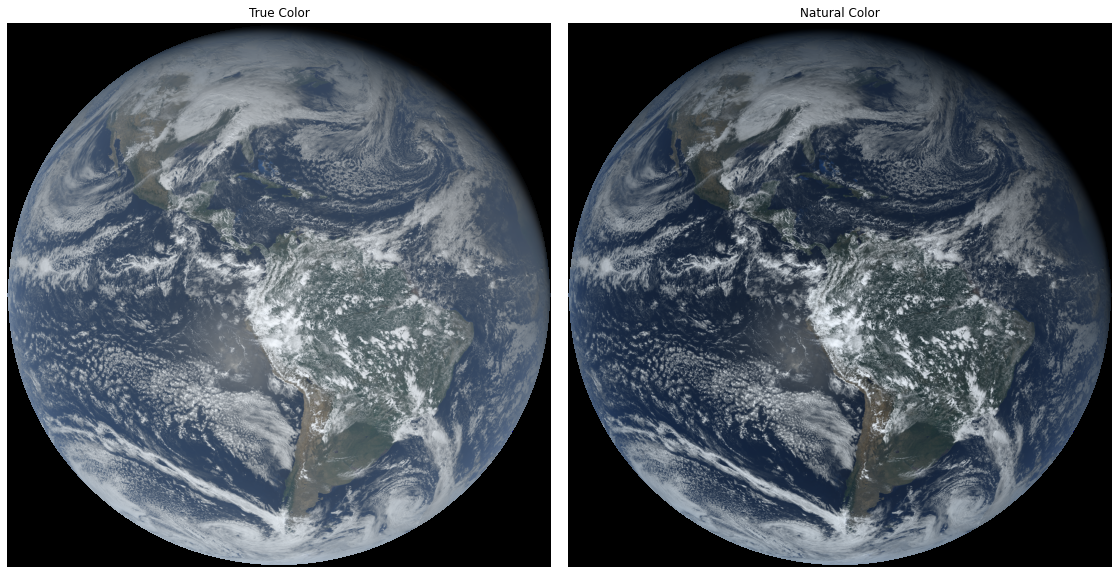

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[20,10])

ax1.imshow(tc.TrueColor)
ax1.set_title('True Color')
ax1.axis('off')

ax2.imshow(nc.NaturalColor)
ax2.set_title('Natural Color')
ax2.axis('off')

plt.subplots_adjust(wspace=0.01)

In [4]:
# These are the albedo value
R = g.CMI_C02
G = g.CMI_C03
B = g.CMI_C01

# Scale the "Green" Channel
G = .45 * R + .1 * G + .45 *B

In [5]:
# Convert Albedo to Brightness, ranging from 0-255 K
R_b = np.sqrt(R*100) * 25.5
G_b = np.sqrt(G*100) * 25.5
B_b = np.sqrt(B*100) * 25.5

In [6]:
def breakpoint_stretch(C, breakpoint):
    """
    Constrast stretching by break point (Rick Kohrs)
    """
    lower = normalize(C, 0, 10)     # Low end
    upper = normalize(C, 10, 255)   # High end
    
    # Combine the two datasets
    # This works because if upper=1 and lower==.7, then 
    # that means the upper value was out of range and the 
    # vaule for the lower pass was used instead.
    combined = np.minimum(lower, upper)
    
    return combined

In [7]:
R_s = breakpoint_stretch(R_b, 33)
G_s = breakpoint_stretch(G_b, 40)
B_s = breakpoint_stretch(B_b, 50)

In [72]:
R_b.max().data

array(260.12924, dtype=float32)

In [8]:
#RGB = np.dstack([R_bn, GG_bn, B_bn])
#RGB = np.dstack([R, G, B])

#RGB = np.dstack([R_bc, GG_bc, B_bc])

RGB = np.dstack([R_s, G_s, B_s])

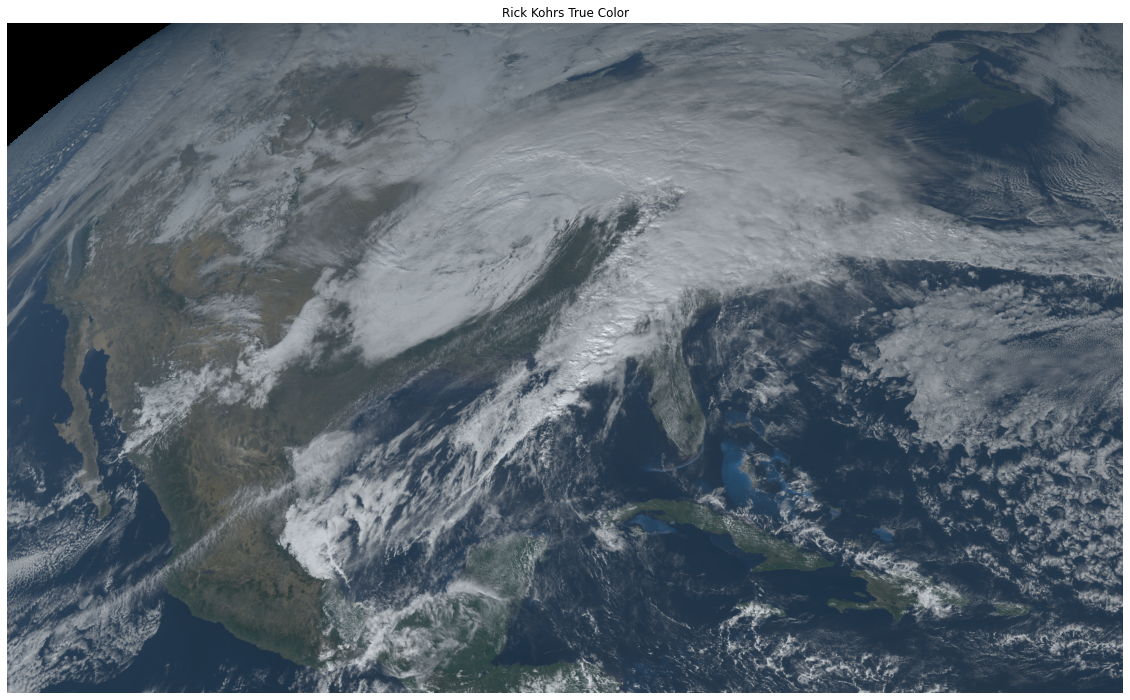

In [9]:
plt.figure(figsize=[20,20])
plt.title('Rick Kohrs True Color')
plt.axis('off')

plt.imshow(RGB)

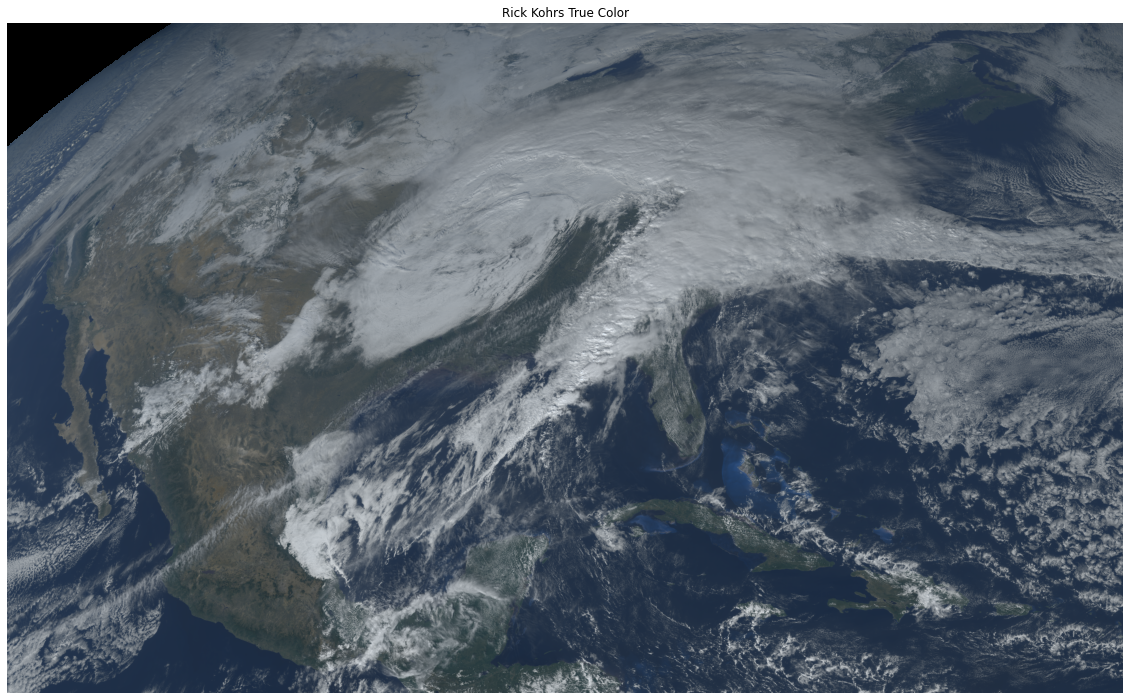

In [90]:
plt.figure(figsize=[20,20])
plt.title('Rick Kohrs True Color')
plt.axis('off')

plt.imshow(np.power(RGB, 1.05))

Gamma Correction: 🌒 Darken image
finished gamma= 0.5
Gamma Correction: 🌒 Darken image
finished gamma= 0.8
Gamma Correction: 🌓 Gamma=1. No correction made.
finished gamma= 1
Gamma Correction: 🌔 Lighten image
finished gamma= 1.2
Gamma Correction: 🌔 Lighten image
finished gamma= 1.5


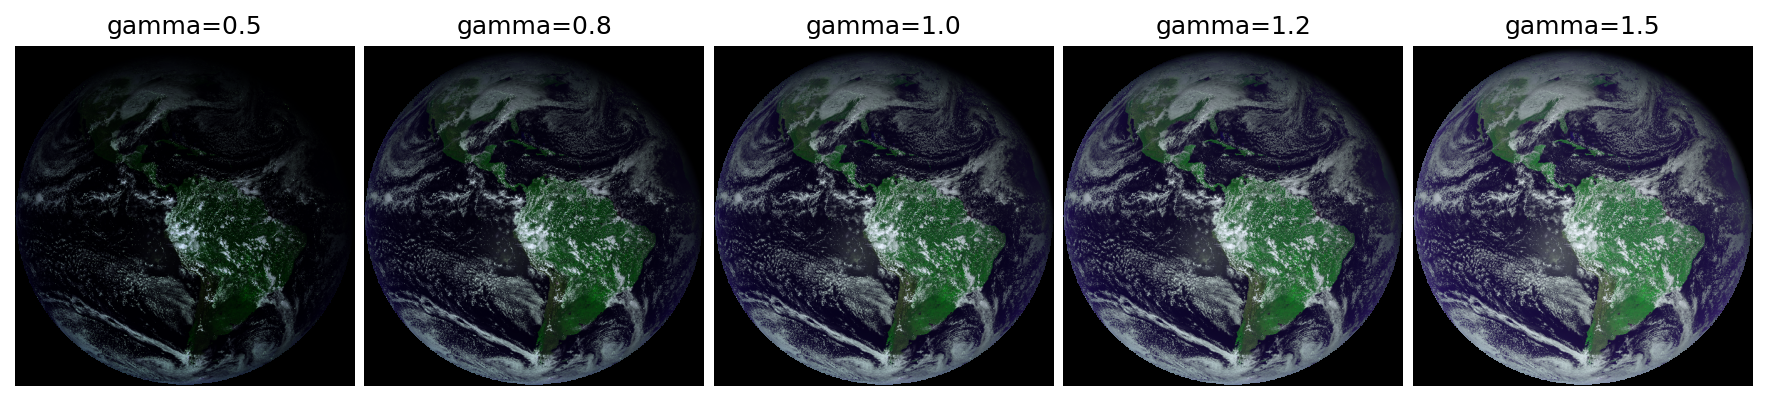

In [20]:
gammas = [.5, .8, 1, 1.2, 1.5]

fig, axes = plt.subplots(1,len(gammas), figsize=[15,3], dpi=150)
for gamma, ax in zip(gammas, axes):
    nc = NaturalColor(g.thin(10), gamma)
    ax.imshow(nc.NaturalColor)
    ax.axis('off')
    ax.set_title(f'gamma={gamma:.1f}')
    print('finished gamma=', gamma)
plt.subplots_adjust(wspace=.01)
    

Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
finished gamma= 1.3
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
finished gamma= 1.7
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
finished gamma= 2.2
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
finished gamma= 2.7
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
Gamma Correction: 🌔 Lighten image
finished gamma= 3.2


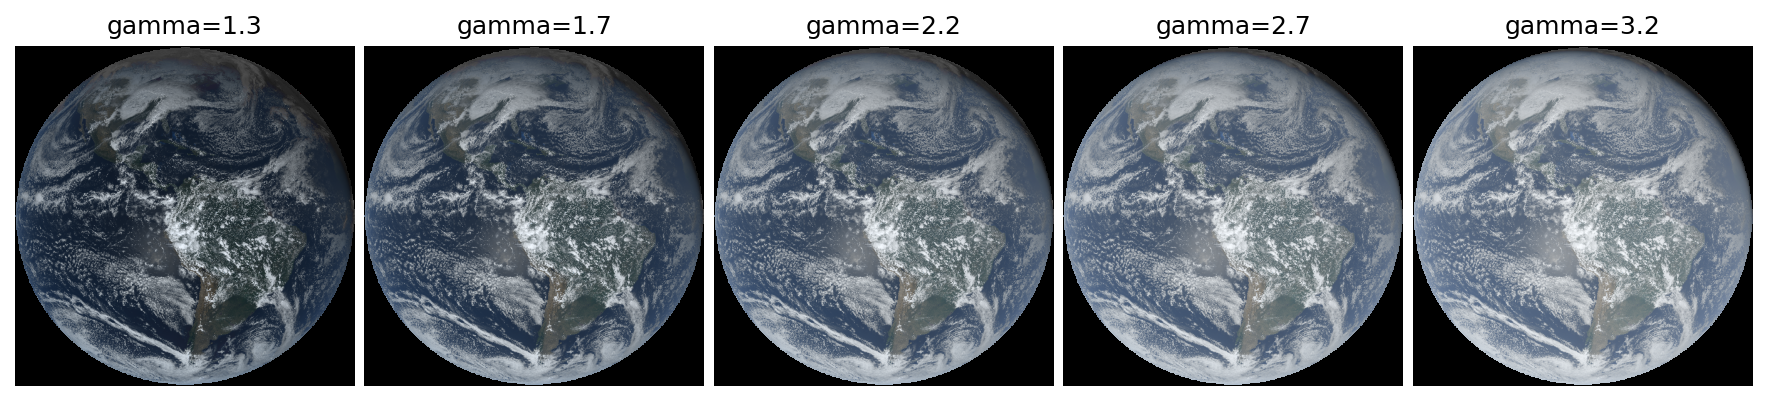

In [24]:
gammas = [1.3, 1.7, 2.2, 2.7, 3.2]

fig, axes = plt.subplots(1,len(gammas), figsize=[15,3], dpi=150)
for gamma, ax in zip(gammas, axes):
    nc = TrueColor(g.thin(10), gamma)
    ax.imshow(nc.TrueColor)
    ax.axis('off')
    ax.set_title(f'gamma={gamma:.1f}')
    print('finished gamma=', gamma)
plt.subplots_adjust(wspace=.01)
    

In [2]:
from goes2go.data import goes_latest
from goes2go.rgb import NormalizedBurnRatio

import matplotlib.pyplot as plt

In [3]:
C = goes_latest(product='ABI')

 _______________________________
 | Satellite: noaa-goes17      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes17/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [7]:
a = NormalizedBurnRatio(C)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


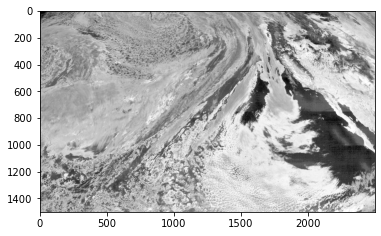

In [11]:
plt.imshow(a.NightFogDifference)

In [6]:
C.band_wavelength_C06

<xarray.DataArray 'band_wavelength_C06' (band: 1)>
array([2.25], dtype=float32)
Coordinates:
    t                    datetime64[ns] 2021-01-14T22:02:36.665750016
    y_image              float32 0.08624
    x_image              float32 0.0
    band_wavelength_C01  (band) float32 0.47
    band_wavelength_C02  (band) float32 0.64
    band_wavelength_C03  (band) float32 0.87
    band_wavelength_C04  (band) float32 1.38
    band_wavelength_C05  (band) float32 1.61
    band_wavelength_C06  (band) float32 2.25
    band_wavelength_C07  (band) float32 3.89
    band_wavelength_C08  (band) float32 6.17
    band_wavelength_C09  (band) float32 6.93
    band_wavelength_C10  (band) float32 7.34
    band_wavelength_C11  (band) float32 8.44
    band_wavelength_C12  (band) float32 9.61
    band_wavelength_C13  (band) float32 10.33
    band_wavelength_C14  (band) float32 11.19
    band_wavelength_C15  (band) float32 12.27
    band_wavelength_C16  (band) float32 13.27
    band_id_C01          (band) int8 1
    band_id_C02          (band) int8 2
    band_id_C03          (band) int8 3
    band_id_C04          (band) int8 4
    band_id_C05          (band) int8 5
    band_id_C06          (band) int8 6
    band_id_C07          (band) int8 7
    band_id_C08          (band) int8 8
    band_id_C09          (band) int8 9
    band_id_C10          (band) int8 10
    band_id_C11          (band) int8 11
    band_id_C12          (band) int8 12
    band_id_C13          (band) int8 13
    band_id_C14          (band) int8 14
    band_id_C15          (band) int8 15
    band_id_C16          (band) int8 16
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G17_s20210142201177_e20210...
    date_created         <U22 '2021-01-14T22:04:08.1Z'
    time_coverage_start  <U22 '2021-01-14T22:01:17.7Z'
    time_coverage_end    <U22 '2021-01-14T22:03:55.6Z'
Dimensions without coordinates: band
Attributes:
    long_name:      ABI band 6 central wavelength
    standard_name:  sensor_band_central_radiation_wavelength
    units:          um